In [1]:
# =============================================================================
# 1. IMPORTAR BIBLIOTECAS
# =============================================================================
import pandas as pd
import numpy as np

# Para tokenização (contagem de tokens, comprimento de palavras etc.)
import nltk
nltk.download('punkt')  # Certifique-se de rodar apenas uma vez

[nltk_data] Downloading package punkt to /home/nanda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# =============================================================================
# 2. CARREGAR DATASET
# =============================================================================
# Exemplo: supondo que seu arquivo se chame 'messages.csv'
# e que as colunas principais sejam: ['message_id', 'user_id', 'channel_id', 'text', 'timestamp']
# Ajuste conforme a sua realidade!
df = pd.read_csv("dataset_zap_2.csv")

# =============================================================================
# 3. VISUALIZAR COLUNAS E ALGUMAS LINHAS
# =============================================================================
print("Colunas no dataset:", df.columns.tolist())
print("\nAlgumas linhas:")
print(df.head())

/tmp/ipykernel_48247/4024074543.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_zap_2.csv")


Colunas no dataset: ['id', 'date_message', 'id_member_anonymous', 'ddi', 'ddd', 'country', 'country_iso3', 'state', 'id_group_anonymous', 'media', 'media_type', 'media_url', 'has_media', 'has_media_url', 'trava_zap', 'text_content_anonymous', 'dataset_info_id', 'latitude', 'longitude', 'date_system', 'score_sentiment', 'score_misinformation', 'id_message', 'id_persona', 'message_type', 'messenger', 'media_name', 'media_md5', 'display_name', 'address_message', 'latitude_message', 'longitude_message', 'contacts_message']

Algumas linhas:
        id                date_message               id_member_anonymous ddi  \
0  1892572  2022-11-01 00:00:00.000000  b16837dd8b9dfc724bb7687d889ba492  55   
1  1892573  2022-11-01 00:00:12.000000  6a8c6eb0b78e68845bce5d047fe592d6  55   
2  1892574  2022-11-01 00:00:11.000000  2b576e303223fbed171322386be15f7c  55   
3  1892575  2022-11-01 00:00:17.000000  8782f8b429c19955446096559732d2b6  55   
4  1892576  2022-11-01 00:00:16.000000  8782f8b429c1995544

In [3]:
print(f"Tamanho do dataset original: {df.shape}")

# =============================================================================
# 3. FILTRAR APENAS LINHAS QUE POSSUEM TEXTO
# =============================================================================
# A coluna que contém o texto parece ser 'text_content_anonymous'
df_text = df.dropna(subset=['text_content_anonymous']).copy()

print(f"Linhas com texto (coluna 'text_content_anonymous' não-nula): {df_text.shape[0]}")

# =============================================================================
# 4. CRIAR FUNÇÕES AUXILIARES PARA TOKENIZAR E CALCULAR ESTATÍSTICAS
# =============================================================================
def tokenize_text(text):
    """Tokeniza usando NLTK e retorna lista de tokens."""
    return nltk.word_tokenize(str(text))

def avg_word_length(token_list):
    """Retorna comprimento médio das palavras em uma lista de tokens."""
    if not token_list:
        return 0
    return np.mean([len(t) for t in token_list])

# =============================================================================
# 5. CRIAR COLUNAS AUXILIARES: TOKENS, Nº DE TOKENS, Nº DE CARACTERES, ETC.
# =============================================================================
# Cria uma coluna 'tokens' para cada linha com texto
df_text['tokens'] = df_text['text_content_anonymous'].apply(tokenize_text)

# Número de tokens
df_text['num_tokens'] = df_text['tokens'].apply(len)

# Número de caracteres no texto (excluindo nulos)
df_text['num_chars'] = df_text['text_content_anonymous'].apply(lambda x: len(str(x)))

# Comprimento médio das palavras
df_text['avg_word_length'] = df_text['tokens'].apply(avg_word_length)

# =============================================================================
# 6. ESTATÍSTICAS DESCRITIVAS SOBRE AS NOVAS COLUNAS
# =============================================================================
print("\n========== ESTATÍSTICAS DE TEXTO ==========")

# 6.1. Quantidade total de mensagens com texto
total_messages = len(df_text)
print(f"Total de mensagens com texto: {total_messages}")

# 6.2. Número de tokens
print("\n--- num_tokens ---")
print("Média:", df_text['num_tokens'].mean())
print("Mediana:", df_text['num_tokens'].median())
print("Desvio Padrão:", df_text['num_tokens'].std())
print("Mínimo:", df_text['num_tokens'].min())
print("Máximo:", df_text['num_tokens'].max())

# 6.3. Número de caracteres
print("\n--- num_chars ---")
print("Média:", df_text['num_chars'].mean())
print("Mediana:", df_text['num_chars'].median())
print("Desvio Padrão:", df_text['num_chars'].std())
print("Mínimo:", df_text['num_chars'].min())
print("Máximo:", df_text['num_chars'].max())

# 6.4. Comprimento médio das palavras
print("\n--- avg_word_length ---")
print("Média:", df_text['avg_word_length'].mean())
print("Mediana:", df_text['avg_word_length'].median())
print("Desvio Padrão:", df_text['avg_word_length'].std())
print("Mínimo:", df_text['avg_word_length'].min())
print("Máximo:", df_text['avg_word_length'].max())

# =============================================================================
# 7. VISUALIZAR ALGUMAS LINHAS COM AS NOVAS COLUNAS
# =============================================================================
print("\nExemplo de linhas com as colunas de análise textual:")
print(df_text[['text_content_anonymous', 'tokens', 'num_tokens',
               'num_chars', 'avg_word_length']].head(5))

Tamanho do dataset original: (549143, 33)
Linhas com texto (coluna 'text_content_anonymous' não-nula): 276748

========== ESTATÍSTICAS DE TEXTO ==========
Total de mensagens com texto: 276748

--- num_tokens ---
Média: 106.49779221530056
Mediana: 18.0
Desvio Padrão: 753.2310148193363
Mínimo: 1
Máximo: 21355

--- num_chars ---
Média: 630.3186256088571
Mediana: 131.0
Desvio Padrão: 4452.187650004934
Mínimo: 1
Máximo: 78939

--- avg_word_length ---
Média: 7.830347972762688
Mediana: 5.833333333333333
Desvio Padrão: 7.184112626479764
Mínimo: 1.0
Máximo: 1364.3333333333333

Exemplo de linhas com as colunas de análise textual:
                               text_content_anonymous  \
0   *Filha de Michelle se manifesta após resultado...   
1                        https://youtu.be/8VoBJcemRZ0   
5   tem q pedir intervenção militar federal com ma...   
6   *PESSOAL O "ARTIGO 142" DIZ QUE O PRESIDENTE T...   
13  https://twitter.com/dcborges2558/status/158713...   

                             

In [4]:
import emoji
import string

# Caso ainda não tenha baixado esses pacotes do NLTK, descomente:
# nltk.download('punkt')
# nltk.download('stopwords')

from nltk.corpus import stopwords

# Definir o conjunto de stopwords em português
stop_words_pt = set(stopwords.words('portuguese'))

# Definir pontuações que queremos remover
punctuation = set(string.punctuation)

# =============================================================================
# 2. Carregar dataset
# =============================================================================
# Supondo que seu DataFrame já esteja em 'df'.
# Se for de um CSV, por exemplo:
# df = pd.read_csv('seu_arquivo.csv')

print(f"Formato original do DF: {df.shape}")

# =============================================================================
# 3. Remover linhas sem texto em 'text_content_anonymous'
# =============================================================================
df = df.dropna(subset=['text_content_anonymous']).copy()
print(f"Formato após remover linhas sem texto: {df.shape}")

# =============================================================================
# 4. Definir função de pré-processamento
# =============================================================================
def preprocess_text(text):
    """
    1) Converte para string e minúsculas
    2) Normaliza emojis, convertendo para ':emoji_name:'
    3) Tokeniza
    4) Remove stopwords e pontuação
    5) Retorna lista de tokens 'limpos'
    """
    # Converte para string e para minúsculas
    text = str(text).lower()
    
    # Normaliza emojis (por exemplo, 🙂 -> :slightly_smiling_face:)
    text = emoji.demojize(text)
    
    # Tokeniza
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords e pontuações
    tokens_clean = []
    for token in tokens:
        # Exemplo simples: descartar se token é pontuação ou está em stopwords
        if token in punctuation:
            continue
        if token in stop_words_pt:
            continue
        tokens_clean.append(token)
    
    return tokens_clean

# =============================================================================
# 5. Aplicar pré-processamento ao DataFrame
# =============================================================================
df['tokens_preprocessed'] = df['text_content_anonymous'].apply(preprocess_text)

# Se quiser um texto "limpo" (strings unidas), pode fazer algo como:
df['clean_text'] = df['tokens_preprocessed'].apply(lambda x: " ".join(x))

# =============================================================================
# 6. Inspecionar resultado
# =============================================================================
print("\nExemplos de pré-processamento:")
print(df[['text_content_anonymous', 'tokens_preprocessed', 'clean_text']].head(5))

# Contar quantas mensagens sobraram
print(f"\nTotal de linhas com texto após pré-processamento: {len(df)}")

Formato original do DF: (549143, 33)
Formato após remover linhas sem texto: (276748, 33)

Exemplos de pré-processamento:
                               text_content_anonymous  \
0   *Filha de Michelle se manifesta após resultado...   
1                        https://youtu.be/8VoBJcemRZ0   
5   tem q pedir intervenção militar federal com ma...   
6   *PESSOAL O "ARTIGO 142" DIZ QUE O PRESIDENTE T...   
13  https://twitter.com/dcborges2558/status/158713...   

                                  tokens_preprocessed  \
0   [filha, michelle, manifesta, após, resultado, ...   
1                     [https, //youtu.be/8vobjcemrz0]   
5   [q, pedir, intervenção, militar, federal, manu...   
6   [pessoal, ``, artigo, 142, '', diz, presidente...   
13  [https, //twitter.com/dcborges2558/status/1587...   

                                           clean_text  
0   filha michelle manifesta após resultado urnas ...  
1                        https //youtu.be/8vobjcemrz0  
5   q pedir intervenção m

In [5]:
# Após o pré-processamento, assumindo que seu DataFrame atualizado chama-se 'df'
# e que você tenha as colunas 'tokens_preprocessed' e 'clean_text':

# Escolha o nome do arquivo de saída, por exemplo 'mensagens_preprocessadas.csv'
output_csv = "mensagens_preprocessadas.csv"

# Salvar em CSV (sep="," ou outro separador se preferir)
# index=False para não incluir a coluna de índice do Pandas
df.to_csv(output_csv, index=False, encoding="utf-8")

print(f"Arquivo salvo com sucesso em: {output_csv}")


Arquivo salvo com sucesso em: mensagens_preprocessadas.csv


#### Abordagem 1: Grupo para grupo

In [6]:
import re

# Vamos supor que você tenha um DataFrame 'df' resultante do pré-processamento
# com as colunas: 'id_group_anonymous' e 'clean_text'
# (ou 'text_content_anonymous' se preferir)
# e que seu dataset contenha n grupos no total.

# =============================================================================
# 1. Identificar grupos únicos
# =============================================================================
all_groups = df['id_group_anonymous'].unique()
print(f"Total de grupos: {len(all_groups)}")

# Pode ser útil criar um dicionário para mapear o "id_group_anonymous" para um índice numérico
group_to_index = {g: i for i, g in enumerate(all_groups)}

# =============================================================================
# 2. Detecção de menções ou "forward" para outro grupo
# =============================================================================
# A lógica abaixo depende de como você reconhece a referência ao "grupo B" no texto do "grupo A".
# Se há um campo específico (exemplo: 'forwarded_from_group' etc.), basta usar esse campo.
# Se for textual, você pode usar Regex para buscar, por exemplo, IDs de grupos no texto.

# Exemplo genérico: se no texto aparece algo como "grupo <id_group_anonymous>", buscar via regex:
# Isso exige que vc tenha algum padrão de menção. Se não tiver, terá que adaptar.

pattern_group_id = r"[0-9a-f]{32}"  
# Exemplo: se seu id_group_anonymous for um hash de 32 caracteres (0-9a-f),
# a regex acima busca um bloco de 32 hexadecimais. Ajuste conforme seu caso!

edges = []  # lista para armazenar as arestas (A, B)

for row in df.itertuples(index=False):
    groupA = getattr(row, 'id_group_anonymous')
    text = getattr(row, 'clean_text')  # ou 'text_content_anonymous'
    
    # Buscar todos os possíveis matches do pattern no texto
    # Supondo que cada match possa ser um id de outro grupo
    found_groups = re.findall(pattern_group_id, str(text))
    
    # Para cada match, se for != do grupo atual, interpretamos como A -> match
    for g_found in found_groups:
        if g_found != groupA and g_found in group_to_index:
            edges.append((groupA, g_found))

# edges agora tem muitos pares (A, B). Podemos convertê-lo em DataFrame para agregar.
edges_df = pd.DataFrame(edges, columns=['source', 'target'])
print(f"Total de interações (bruto): {len(edges_df)}")

# =============================================================================
# 3. Agregar e contar quantas vezes A referiu B
# =============================================================================
edges_agg = edges_df.value_counts().reset_index(name='weight')
# value_counts() retorna a contagem de pares (source, target)
# e 'weight' é o nº de mensagens em que A referiu B.

print(edges_agg.head())

# =============================================================================
# 4. Opcional: salvar edge list para uso em análises de rede
# =============================================================================
edges_agg.to_csv("edge_list_grupos.csv", index=False)
print("Lista de arestas (A->B) salva em 'edge_list_grupos.csv'.")

# =============================================================================
# 5. Próximos passos
# =============================================================================
# A partir do arquivo 'edge_list_grupos.csv', você pode:
# - Carregar no NetworkX e criar um DiGraph
# - Calcular centralidades, decomposição núcleo-periferia, etc.


Total de grupos: 236
Total de interações (bruto): 0
Empty DataFrame
Columns: [source, target, weight]
Index: []
Lista de arestas (A->B) salva em 'edge_list_grupos.csv'.


In [7]:

# Vamos supor que seu DataFrame final (pré-processado) é 'df', 
# com as colunas: 'id_group_anonymous' e 'clean_text'.
# Caso seu texto esteja em 'text_content_anonymous', ajuste o código.

# 1. Regex para capturar links 'chat.whatsapp.com/...'
pattern_link = r"(chat\.whatsapp\.com/[A-Za-z0-9]+)"

edges = []  # lista de arestas (group, link)

for row in df.itertuples(index=False):
    group_id = getattr(row, 'id_group_anonymous')
    text = getattr(row, 'clean_text')  # substitua se usa outra coluna

    # Encontrar todos os links no texto
    found_links = re.findall(pattern_link, str(text))
    # Cada link encontrado vira um nó do tipo "link"
    for link in found_links:
        # Cria uma aresta (Grupo -> Link)
        edges.append((group_id, link))

# Converte para DataFrame
edges_df = pd.DataFrame(edges, columns=['source', 'target'])
print("Quantidade total de (grupo->link) encontrados:", len(edges_df))

# 2. Agregar e contar quantas vezes cada (grupo, link) apareceu
edges_agg = edges_df.value_counts().reset_index(name='weight')
print("\nExemplo de arestas com contagem (weight):")
print(edges_agg.head())

# 3. Salvar edge list
edges_agg.to_csv("edge_list_grupo_link.csv", index=False)
print("\nLista de arestas salva em 'edge_list_grupo_link.csv'.")


Quantidade total de (grupo->link) encontrados: 13086

Exemplo de arestas com contagem (weight):
                             source                                    target  \
0  cf32d27ec4f76670745647dfa7042662  chat.whatsapp.com/gyc7muaqsodi3dsmyivz2m   
1  165a7c53829ca1c5f3a3f161c25d4e01  chat.whatsapp.com/ckl7orwiyej57xfgcai74e   
2  cb9049c31a5db299b4a7e19afc7d3f31  chat.whatsapp.com/ckl7orwiyej57xfgcai74e   
3  165a7c53829ca1c5f3a3f161c25d4e01  chat.whatsapp.com/jjcrk0lijzc6puk4no4h3z   
4  cb9049c31a5db299b4a7e19afc7d3f31  chat.whatsapp.com/jjcrk0lijzc6puk4no4h3z   

   weight  
0     218  
1     165  
2     165  
3     138  
4     135  

Lista de arestas salva em 'edge_list_grupo_link.csv'.


In [8]:
import networkx as nx

# Carregar edges
edges_bip = pd.read_csv("edge_list_grupo_link.csv")

# Criar um grafo NÃO-DIRIGIDO bipartido (NetworkX entende bipartição melhor em modo undirected)
B = nx.from_pandas_edgelist(
    edges_bip,
    source="source",
    target="target",
    edge_attr="weight",  # se quiser guardar o peso
    create_using=nx.Graph()
)

print(f"Grafo bipartido: {B.number_of_nodes()} nós, {B.number_of_edges()} arestas.")

Grafo bipartido: 1420 nós, 3214 arestas.


In [9]:
# Conjunto de nós do tipo grupo
groups = set(edges_bip['source'].unique())

# Conjunto de nós do tipo link
links = set(edges_bip['target'].unique())

print(f"Nós de grupo: {len(groups)}")
print(f"Nós de link: {len(links)}")


Nós de grupo: 155
Nós de link: 1265


In [10]:
from networkx.algorithms import bipartite

G_groups = bipartite.projected_graph(B, groups)

print(f"Projeção em grupos: {G_groups.number_of_nodes()} nós, {G_groups.number_of_edges()} arestas.")


Projeção em grupos: 155 nós, 2179 arestas.


In [11]:
# Weighted projection
G_groups_weighted = bipartite.weighted_projected_graph(B, groups)

# Exemplo de acesso ao peso de uma aresta (u,v)
for (u, v, w) in G_groups_weighted.edges(data='weight'):
    print(u, v, w)  # w = número de links em comum


a5910d5cc1c830ade9eb4dd00f15ff6a f6b5c7a052fda70a8276cc14416cc3d3 6
a5910d5cc1c830ade9eb4dd00f15ff6a 7d9da91b5926ef37e63a7b68de81fef5 1
a5910d5cc1c830ade9eb4dd00f15ff6a ab6b15851eba775fddb0fac2ab1d32b4 3
a5910d5cc1c830ade9eb4dd00f15ff6a 64413647daa2460b187cfd1d25f50634 1
a5910d5cc1c830ade9eb4dd00f15ff6a dad0c53233383b2a10de621b815dfe8e 1
a5910d5cc1c830ade9eb4dd00f15ff6a fb92e0eb8b146bc0fe68c0971de04eb9 1
a5910d5cc1c830ade9eb4dd00f15ff6a 59324f9be83e4ddff1e1dbf4b53bc803 2
a5910d5cc1c830ade9eb4dd00f15ff6a a21e345df622673029c0b7ded53ce273 1
a5910d5cc1c830ade9eb4dd00f15ff6a cc5e4cc227dcf06d2ea3783e429b85bd 1
a5910d5cc1c830ade9eb4dd00f15ff6a 992ad59ad0b193006afe7d52ab194201 2
a5910d5cc1c830ade9eb4dd00f15ff6a aa0703b0ccc34be2545ea7ed8c6e7010 1
a5910d5cc1c830ade9eb4dd00f15ff6a 89e1d58d139853767c231f0f65b59847 1
a5910d5cc1c830ade9eb4dd00f15ff6a c014e1c0fb75f0e00ac6680c028b2848 1
a5910d5cc1c830ade9eb4dd00f15ff6a d779a41dcb77a3b96176a2f6ceba4595 2
a5910d5cc1c830ade9eb4dd00f15ff6a b14e237b7d02b83

In [12]:
centralities = nx.pagerank(G_groups_weighted)
# ou
# centralities = nx.katz_centrality(G_groups_weighted, alpha=0.005)


In [13]:
# Gerar edge list do G_groups_weighted
edges_data = []
for u, v, w in G_groups_weighted.edges(data='weight'):
    edges_data.append((u, v, w))

edges_projected = pd.DataFrame(edges_data, columns=['source', 'target', 'weight'])
edges_projected.to_csv("edges_groups_projected.csv", index=False)


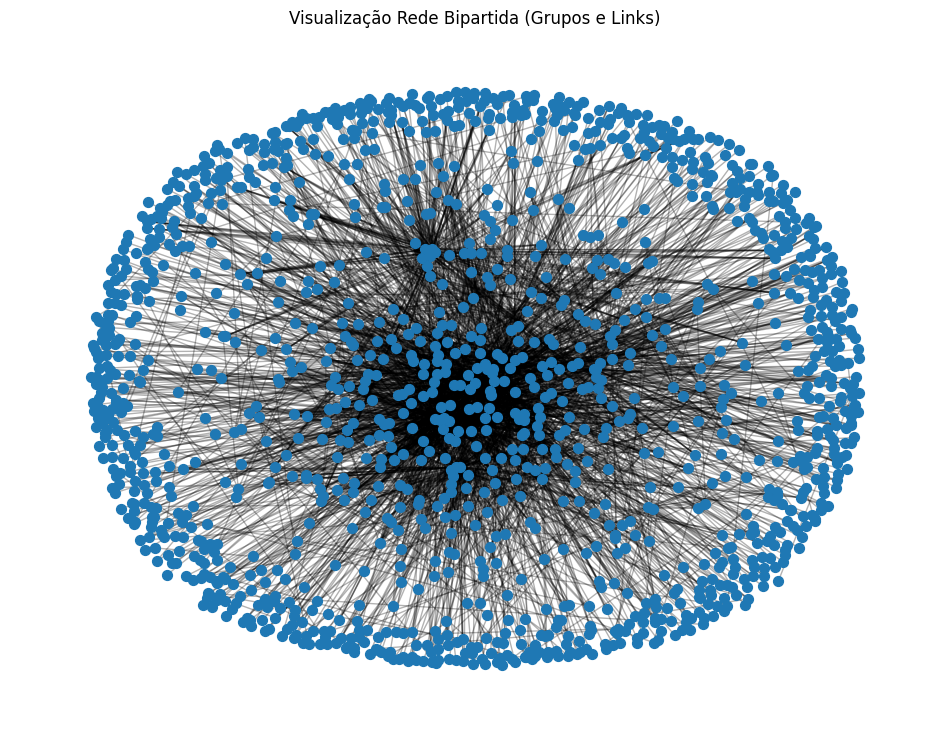

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Se você já criou o grafo bipartido B (com create_using=nx.Graph()), use-o diretamente:
# Exemplo:
# B = nx.from_pandas_edgelist(edges_agg, 'source', 'target', create_using=nx.Graph())

# Opção: se acabou de ler do CSV
# edges_bip = pd.read_csv("edge_list_grupo_link.csv")
# B = nx.from_pandas_edgelist(edges_bip, 'source', 'target', edge_attr='weight', create_using=nx.Graph())

# 1. Layout (por exemplo, spring_layout) - pode ser lento com grafos grandes
pos = nx.spring_layout(B, k=0.5, iterations=50)

# 2. Plotar nós e arestas
plt.figure(figsize=(12, 9))  # tamanho do gráfico em polegadas

nx.draw_networkx_nodes(B, pos, node_size=50)  # node_size ajustável
nx.draw_networkx_edges(B, pos, alpha=0.3)     # alpha para ver melhor sobreposição
# Desenhar rótulos se quiser (mas cuidado com poluição visual):
# nx.draw_networkx_labels(B, pos, font_size=7)

plt.title("Visualização Rede Bipartida (Grupos e Links)")
plt.axis("off")
plt.show()


In [15]:
# pip install pyvis
from pyvis.network import Network

net = Network(notebook=True, height="750px", width="100%", bgcolor="#ffffff", font_color="#000000")

# Adicionar nós e arestas do seu grafo G_groups_weighted
for node in G_groups_weighted.nodes():
    net.add_node(node, label=node)

for u, v, w in G_groups_weighted.edges(data='weight'):
    net.add_edge(u, v, value=w)  # ou label=str(w)

# net.show_buttons(filter_=['physics'])  # se quiser controlar layout
net.show("graph.html")


graph.html
